In [1]:
import fenics as fe
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# from ipywidgets import IntProgress
# from IPython.display import display

# from mpl_toolkits.mplot3d import Axes3D

In [3]:
from ipywidgets import IntProgress
from IPython.display import display

def log_progress(sequence, every=10):
    progress = IntProgress(min=0, max=len(sequence), value=0)
    display(progress)

    for index, record in enumerate(sequence):
        
        if index % every == 0:
            progress.value = index
        yield record
    progress.value = len(sequence)

# Solving

### Mesh

In [4]:
mesh= fe.UnitSquareMesh(20,20)
space = fe.FunctionSpace(mesh,'Lagrange',1)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [5]:
trial_f=fe.TrialFunction(space);
test_f=fe.TestFunction(space);

### Boundaries

In [6]:
def boundary(x):
    tol = 1e-14
    a = (
        fe.near(x[0], 0, tol) or 
        fe.near(x[0], 2, tol) or 
        fe.near(x[1], 0, tol) or 
        fe.near(x[1], 1, tol)
        )

    return a

# f_bound = fe.Expression('1+x[0]', degree=2)
f_bound =fe.Constant(0)

bcs = fe.DirichletBC(space, f_bound, boundary)

### Equations

In [7]:
dx=fe.dx

In [8]:
g=fe.Constant(1)
g2 = fe.Expression(
    '''
    x[0]>=0 && x[1]>=0 ? pow(x[0], 2) 
    :exp(-kappa*pow(pi, 2)*t)*sin(pi*k*x[0])
    ''',
    kappa=1,t=3,k=2,
    degree=2)
# g=fe.Expression('1',degree=0)

In [9]:
eqB = fe.dot(fe.grad(trial_f), fe.grad(test_f)) * dx
eqL = g2 * test_f * dx

### Solving

In [10]:
f=fe.Function(space)
fe.solve(eqB==eqL,f,bcs)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


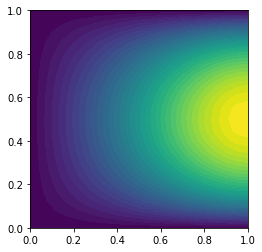

In [11]:
fe.plot(f)